C:\Users\Vinny\AppData\Local\Temp\ipykernel_11356\4150681948.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  oil['dcoilwtico'].fillna(method='ffill', inplace=True)  # Forward fill oil prices
C:\Users\Vinny\AppData\Local\Temp\ipykernel_11356\4150681948.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oil['dcoilwtico'].fillna(method='ffill', inplace=True)  # Forward fill oil prices


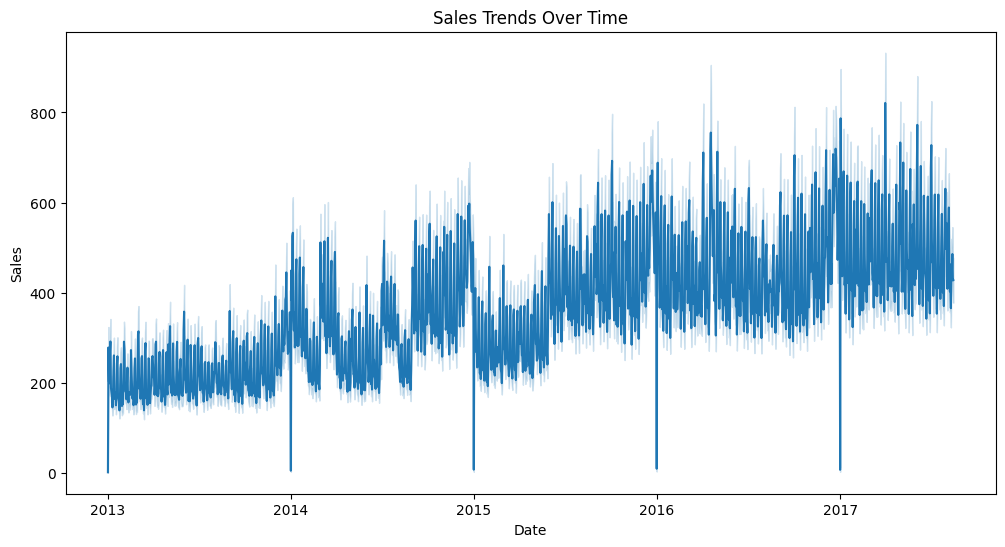

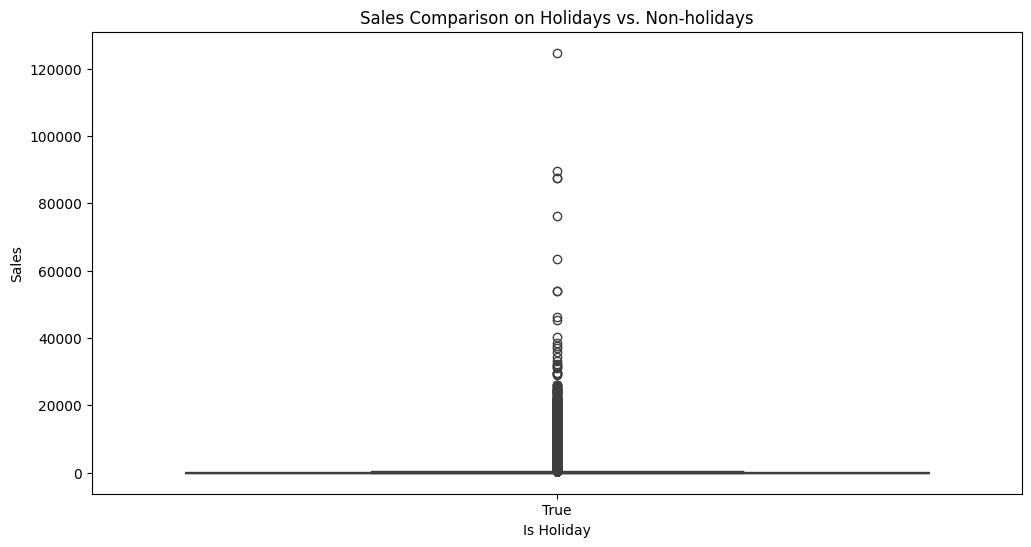

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data
holidays_events = pd.read_csv('holidays_events.csv')
oil = pd.read_csv('oil.csv')
stores = pd.read_csv('stores.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
transactions = pd.read_csv('transactions.csv')

# Convert 'date' columns to datetime
holidays_events['date'] = pd.to_datetime(holidays_events['date'])
oil['date'] = pd.to_datetime(oil['date'])
test['date'] = pd.to_datetime(test['date'])
train['date'] = pd.to_datetime(train['date'])
transactions['date'] = pd.to_datetime(transactions['date'])

# Handling missing values (example)
oil['dcoilwtico'].fillna(method='ffill', inplace=True)  # Forward fill oil prices

# Merging datasets
train = train.merge(transactions, on=['date', 'store_nbr'], how='left')
train = train.merge(oil, on='date', how='left')
train = train.merge(stores, on='store_nbr', how='left')
train = train.merge(holidays_events, on='date', how='left', suffixes=('', '_holiday'))

# Feature engineering
train['is_holiday'] = train['type'].notna()

# Exploratory Data Analysis (EDA)
## Sales trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='sales', data=train)
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

## Effect of holidays on sales
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_holiday', y='sales', data=train)
plt.title('Sales Comparison on Holidays vs. Non-holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Sales')
plt.show()

# Save the enriched dataset
train.to_csv('enriched_train_data.csv', index=False)


C:\Users\Vinny\AppData\Local\Temp\ipykernel_11356\2182553044.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(0, inplace=True)  # Handling missing values by replacing them with 0


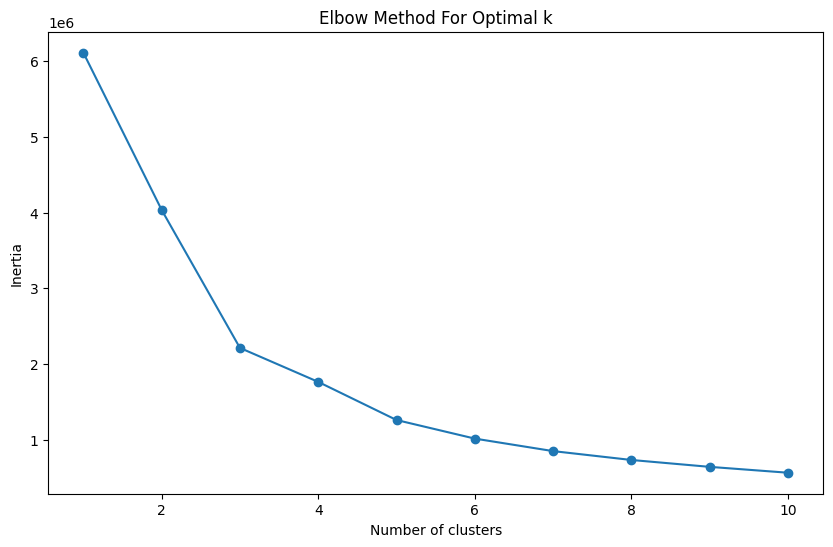

  cluster        sales                        transactions          \
                  mean    median          std         mean  median   
0       0  5202.399595  4270.831  2725.428292  2392.188833  2057.0   
1       1   165.507219     6.000   403.416799  1228.355368  1220.0   
2       2   296.294634    28.000   525.692467  3065.513843  2848.0   

               store_nbr  
           std     count  
0  1123.586546    100410  
1   391.104041   2301706  
2   840.669383    652232  


C:\Users\Vinny\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


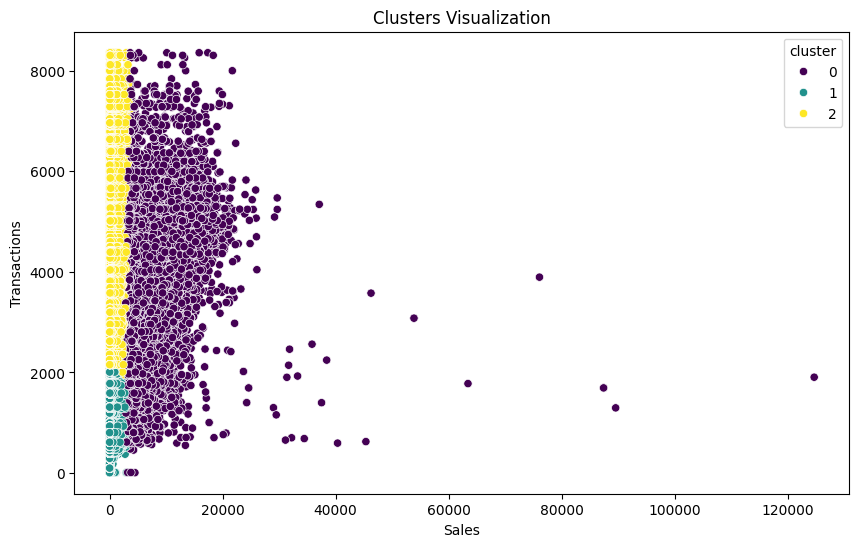

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train' is the DataFrame obtained from merging and preprocessing steps
# Feature selection for clustering
features = train[['sales', 'transactions']]
features.fillna(0, inplace=True)  # Handling missing values by replacing them with 0

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow Method to determine the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Clustering with K-Means
optimal_k = 3  # Example: chosen based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Adding the cluster labels to the DataFrame for analysis
train['cluster'] = clusters

# Analyzing Clusters
cluster_summary = train.groupby('cluster').agg({
    'sales': ['mean', 'median', 'std'],
    'transactions': ['mean', 'median', 'std'],
    'store_nbr': 'count'
}).reset_index()

print(cluster_summary)

# Visualization of Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sales', y='transactions', hue='cluster', data=train, palette='viridis')
plt.title('Clusters Visualization')
plt.xlabel('Sales')
plt.ylabel('Transactions')
plt.show()
